<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Implementation

In [2]:
#steepest descent.
def Steepest_descent(alpha,x_0,f,grad_f,tol_grad=10**(-4),max_iter=10**5,pr="False"):
    x_1=x_0-alpha*np.array(grad_f(x_0))#First iteration
    if(pr=='True'):
        print("Initial approximation: ", x_0)
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    norm_grad=np.linalg.norm(grad_f(x_1))
    #Cycle
    while(norm_grad>tol_grad and k<max_iter):#stop criteria
        k+=1
        x_1=x_0-alpha*np.array(grad_f(x_0))
        x_0=x_1
        norm_grad=np.linalg.norm(grad_f(x_1))
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1))
    else:
        if(pr=='True'):
            plt.plot(range(201,len(F)),F[200:-1])#Posterior convergence
            plt.title("k vs. F(X_k)")   
            plt.show()         
            plt.plot(range(201,len(G)),G[200:-1])
            plt.title("k vs. ||g(X_k)||")   
            plt.show()         
        print("iterations: ",k)
        return (x_1)

In [3]:
def Newton(x_0,f,grad_f,Hess_f,tol_grad=10**(-4),pr='False',max_iter=10**4):
    d=np.linalg.solve(Hess_f(x_0),-np.array(grad_f(x_0)))
    x_1=x_0+d
    if(pr=='True'):
        print("Initial approximation: ", x_0)
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    while(np.linalg.norm(grad_f(x_0))>tol_grad):
        k+=1
        d=np.linalg.solve(Hess_f(x_0),-np.array(grad_f(x_0)))
        x_1=x_0+d
        x_0=x_1
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1))
    else:
        if(pr=='True'):
            plt.plot(range(201,len(F)),F[200:-1])#Posterior convergence
            plt.title("k vs. F(X_k)")   
            plt.show()         
            plt.plot(range(201,len(G)),G[200:-1])
            plt.title("k vs. ||g(X_k)||")   
            plt.show()         
        print("iterations: ",k)
        return (x_1)

In [ ]:
#Exercise 2. Rosembrok's function.---------------------------------------------

In [4]:
def Rosembrok(X):#X es un vector.
    suma=0
    for i in range(len(X)-1):#Se puede otpimizar.
        suma+=100*((X[i+1]-X[i]**2)**2)+(1-X[i])**2
    return (suma)
def Rosembrok_grad(X):
    D=[]
    D.append(-400*(X[0]*(X[1]-X[0]**2))-2*(1-X[0]))
    for i in range(1,len(X)-1):
        D.append(-400*(X[i]*(X[i+1]-X[i]**2))+200*(X[i]-X[i-1]**2)-2*(1-X[i]))
    D.append(200*(X[-1]-X[-2]**2))
    return D
def Rosembrok_Hessian(X):
    M=[]
    #Renglon 1
    D=np.zeros(len(X))
    D[0]=(-400*(X[1]-X[0]**2)+800*(X[0]**2)+2)
    D[1]=-400*(X[1])
    M.append(D)
    #Renglon 2<i<n
    for i in range(1,len(X)-1):
        D=np.zeros(len(X))
        D[i]=(-400*(X[i+1]-X[i]**2)+800*(X[i]**2)+202)
        D[i-1]=-400*X[i-1]
        D[i+1]=-400*X[i]
        M.append(D)
    #Renglon n
    D=np.zeros(len(X))
    D[-2]=-400*X[-2]
    D[-1]=200
    M.append(D)
    return M

Initial approximation:  [-1.2, 1]


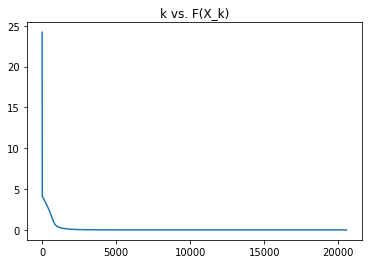

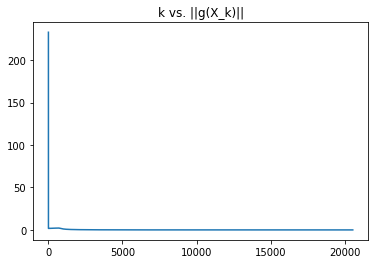

iterations:  20548
local minimum approximation:  [0.99988824 0.99977604]

X_0 random
Initial approximation:  [1.88202617 1.2000786 ]


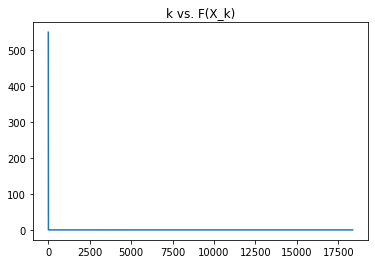

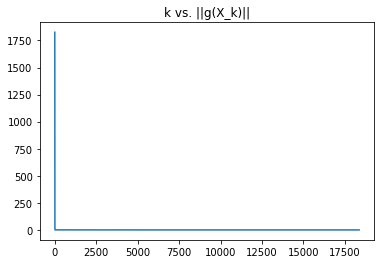

iterations:  18363
local minimum approximation:  [0.99988821 0.99977599]


In [ ]:
#Grafica
#Case n=2----------------------------------
print("local minimum approximation: ",(Steepest_descent(alpha=0.001,x_0=[-1.2,1],f=Rosembrok,grad_f=Rosembrok_grad,pr='True')))#Si ploteo G[200:-1] se ve mas bonito.
print("\nX_0 random")
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=2)#Close to the minimum
print("local minimum approximation: ",(Steepest_descent(alpha=0.001,x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,pr='True')))#Si ploteo G[200:-1] se ve mas bonito.

Initial approximation:  [-1.2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1.2, 1]


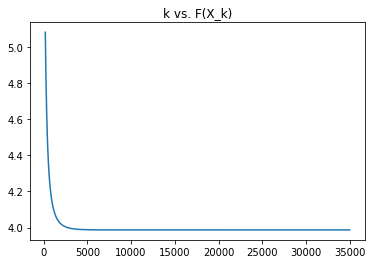

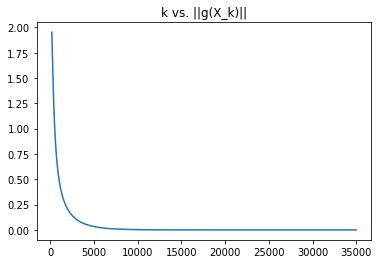

iterations:  34984
local minimum approximation:  [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998725  0.99999365  0.99999683
  0.99999842  0.99999921  0.99999961  0.9999998   0.9999999   0.99999995
  0.99999998  0.99999999  0.99999999  1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1. 

In [ ]:
#Case n=100----------------------------------
n=100
x_0=[]
x_0.append(-1.2)
for i in range(1,n-2):
    x_0.append(1)
x_0.append(-1.2)
x_0.append(1)
loc_min=Steepest_descent(alpha=0.001,x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,pr='True',tol_grad=10**(-8))
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))

Initial approximation:  [ 1.38333159  1.17814641  0.11573077  1.1777409   1.40725991  1.02946279
  0.90747316  0.59617576  0.27673265  1.40014897  0.84544278  0.88326667
  1.86636059  1.34225055  1.1854125   1.0710309   1.75999743  1.85979465
  1.46475256  1.2911123  -0.04730154  1.06186096  0.93494652  1.04697661
  1.47152304 -0.36983858  0.71534397  1.13495218  0.76657723  0.29154694
  1.43448174  1.13843595  0.51444771  1.1574086   1.41079286  1.00264632
  1.4002824   1.03913009  0.80238551  0.42028974  0.95703462  1.09714647
  1.43791638  0.94244627  1.2287078   0.51769399  0.60868542  0.94480535
  0.47268577  1.41012392  1.23156516  1.13954788  1.16945206  2.01052178
  0.76556791 -0.10072064  1.0996501   0.97469823  0.74124048  0.51058507
  0.78040524  1.09066921  0.74859165  2.20622684  0.51974781  0.60344132
 -0.14431002  1.12574221 -0.00820331  0.73027268  0.86216473  0.64513602
  1.86943634  1.4971972   1.65956844  0.55879059  1.56429703  1.24800047
  1.38570297  1.51471941  0

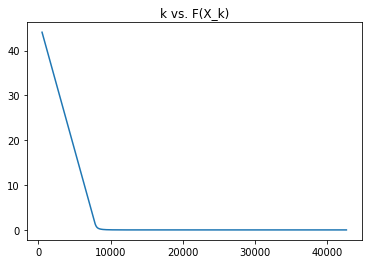

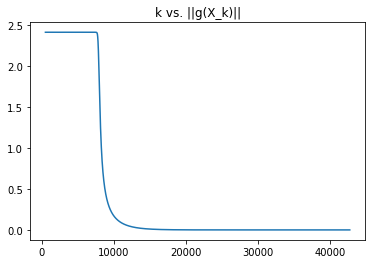

iterations:  42707
local minimum approximation:  [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.    

In [ ]:
x_0=np.random.normal(1,0.5,size=n)
loc_min=Steepest_descent(alpha=0.001,x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,pr='True',tol_grad=10**(-8))#Si ploteo G[200:-1] se ve mas bonito.
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))

In [ ]:
#Exercise 2. Rosembrok's function with Newton's algorithm.-------------------

Initial approximation:  [-1.2, 1]


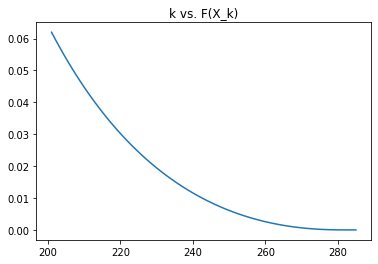

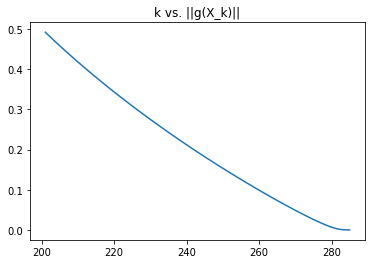

iterations:  286
local minimum approximation:  [1. 1.]
f-Value:  5.363586112503317e-19
Initial approximation:  [-1.1764052345967664, 1]


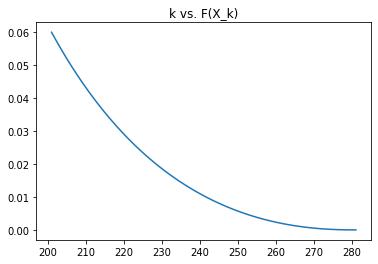

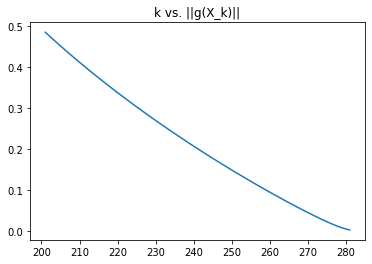

iterations:  282
local minimum approximation:  [0.99954812 0.9990957 ]
f-Value:  2.0425049255106164e-07
Initial approximation:  [-1.2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1.2, 1]


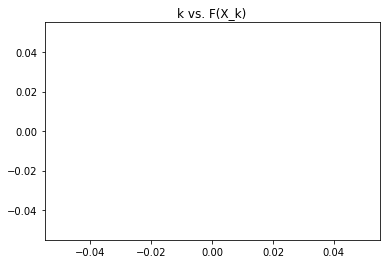

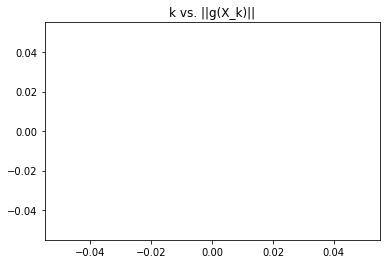

iterations:  12
local minimum approximation:  [-0.9932875   0.99665177  0.99833067  0.99916791  0.99958529  0.99979332
  0.999897    0.99994867  0.99997442  0.99998725  0.99999365  0.99999683
  0.99999842  0.99999921  0.99999961  0.9999998   0.9999999   0.99999995
  0.99999998  0.99999999  0.99999999  1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.    

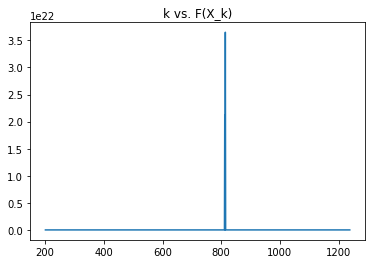

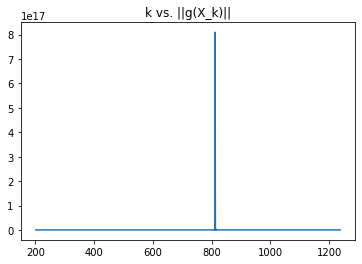

iterations:  1239
local minimum approximation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
f-Value:  1.3578628192698333e-21


In [15]:
#n=2
#Given X_0---------------------------------------
x_0=[-1.2,1]
loc_min=Newton(x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,Hess_f=Rosembrok_Hessian,pr='True',tol_grad=10**(-6))
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))
#Random X_0---------------------------------------por qué tarda tanto?
np.random.seed(0)
x_0= [-np.random.normal(1,.1),1]
loc_min=Newton(x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,Hess_f=Rosembrok_Hessian,pr='True',tol_grad=10**(-3),max_iter=10)
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))
#n=100
#Given X_0---------------------------------------
n=100
x_0=[]
x_0.append(-1.2)
for i in range(1,n-2):
    x_0.append(1)
x_0.append(-1.2)
x_0.append(1)
loc_min=Newton(x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,Hess_f=Rosembrok_Hessian,pr='True',tol_grad=10**(-3),max_iter=10)
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))
#Random X_0---------------------------------------
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=100)
loc_min=Newton(x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,Hess_f=Rosembrok_Hessian,pr='True',tol_grad=10**(-6))
print("local minimum approximation: ",(loc_min))
print("f-Value: ",Rosembrok(loc_min))

In [ ]:
#Exercise 2. Wood's function.---------------------------------------------

In [17]:
def Wood(X):
    return (100*(X[0]**2-X[1])**2+(X[0]-1)**2+(X[2]-1)**2+90*(X[2]**2-X[3])**2+10.1*((X[1]-1)**2+(X[3]-1)**2)+19.8*(X[1]-1)*(X[3]-1))
def Wood_grad(X):
    G=[]
    G.append(400*X[0]*(X[0]**2-X[1])+2*(X[0]-1))
    G.append(-200*(X[0]**2-X[1])+20.2*(X[1]-1)+19.8*(X[3]-1))
    G.append(2*(X[2]-1)+360*(X[2]**2-X[3])*X[2])
    G.append(-180*(X[2]**2-X[3])+20.2*(X[3]-1)+19.8*(X[1]-1))
    return G
def Wood_Hessian(X):
    D1=[2+400*(X[0]**2-1)+800*X[0]**2,-400*X[0],0,0]
    D2=[-400*X[0],220.2,0,19.8]
    D3=[0,0,2+720*(X[2]**2)+360*(X[2]-X[3]),-360*X[2]]
    D4=[0,19.8,-360*X[2],200.2]
    return [D1,D2,D3,D4]


In [ ]:
print("local minimum approximation: ",Steepest_descent(alpha=0.00001,x_0=[-3,-1,-3,-1],f=Wood,grad_f=Wood_grad,pr='True',max_iter=100000,))

Initial approximation:  [-3, -1, -3, -1]
There wasnt convergence after 100000 iterations.
Last iteration: [-0.96889398  0.94891635 -0.96859671  0.9494705 ]


Initial approximation:  [1.88202617 1.2000786  1.48936899 2.1204466 ]


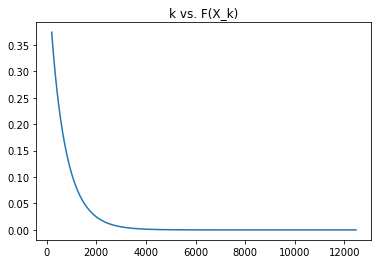

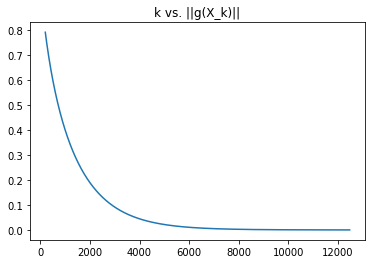

iterations:  12471
local minimum approximation:  [0.99995611 0.99991208 1.00004388 1.00008792]
f-Value:  6.948228755169045e-09


In [ ]:
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=4)
loc_min=Steepest_descent(alpha=0.001,x_0=x_0,f=Wood,grad_f=Wood_grad,pr='True',max_iter=100000,)
print("local minimum approximation: ",loc_min)
print("f-Value: ",Wood(loc_min))

Initial approximation:  [-3, -1, -3, -1]


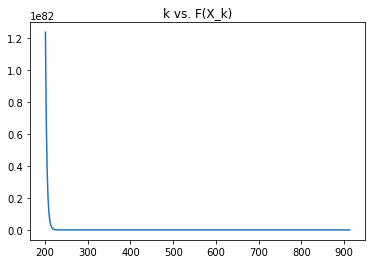

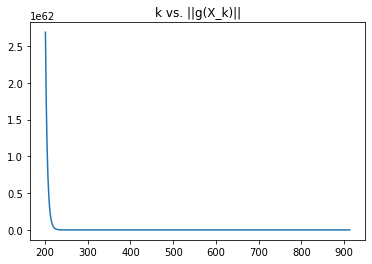

iterations:  914
local minimum approximation:  [1.00000071 1.0000014  0.99999931 0.99999862]
f-Value:  1.761729111701706e-12
Initial approximation:  [1.88202617 1.2000786  1.48936899 2.1204466 ]


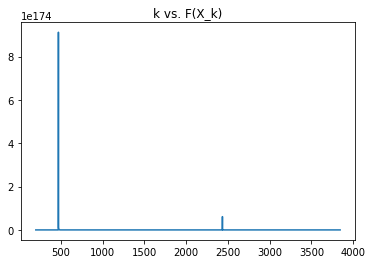

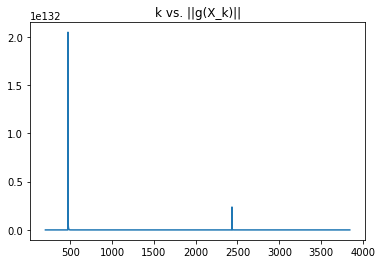

iterations:  3845
local minimum approximation:  [1.00000245 1.00000487 0.99999761 0.99999521]
f-Value:  2.1228092492768136e-11


In [18]:
#Exercise 2. Wood's function with Newton's algorithm
x_0=[-3,-1,-3,-1]
loc_min=Newton(x_0=x_0,f=Wood,grad_f=Wood_grad,Hess_f=Wood_Hessian, pr='True',max_iter=1000,)
print("local minimum approximation: ",loc_min)
print("f-Value: ",Wood(loc_min))
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=4)
loc_min=Newton(x_0=x_0,f=Wood,grad_f=Wood_grad,Hess_f=Wood_Hessian, pr='True',max_iter=1000,)
print("local minimum approximation: ",loc_min)
print("f-Value: ",Wood(loc_min))

In [ ]:
#Exercise 3.----------------------------------------

In [19]:
for l in [1,10,100]:
    s=np.random.uniform(0.5,1)
    print("When $\lambda=$", l, )
    def gen_y(s,n,pr='False'):
        etha=np.random.normal(0,s)
        t=[]
        y=[]
        for i in range(n-1):
            t.append(((2/(n-1))*(i)-1))
            y.append((t[-1]**2+etha))
        t.append(1)
        y.append((t[-1]**2+etha))
        if(pr=='True'):
            print(t)
            print(y)
            plt.plot(t,y)
        return (y)
    x=np.zeros(128)
    Y=gen_y(s=s,n=128)
    def f_normal(X,l=l,Y=Y):
        n=len(X)
        suma=0
        for i in range(n-1):
            suma+=(X[i]-Y[-1])**2+l*(X[i+1]-X[i])**2
        suma+=(X[-1]-Y[-1])**2
        return suma
    def f_normal_grad(X,l=l,Y=Y):
        D=[]
        D.append(2*(X[0]-Y[0])-2*l*(X[1]-X[0]))
        for i in range(1,len(X)-1):
            D.append(2*(X[i]-Y[i])-2*l*(X[i+1]-X[i])+2*l*(X[i]-X[i-1]))
        D.append(2*(X[-1]-Y[-1])-2*l*(X[-1]-X[-2]))
        return D
    def f_normal_Hessian(X,l=l,Y=Y):##
        M=[]
        #Renglon 1
        D=np.zeros(len(X))
        D[0]=2+2*l
        D[1]=-2*l
        M.append(D)
        #Renglon 2<i<n
        for i in range(1,len(X)-1):
            D=np.zeros(len(X))
            D[i]=2
            D[i-1]=-2*l
            D[i+1]=-2*l
            M.append(D)
        #Renglon n
        D=np.zeros(len(X))
        D[-2]=-2*l
        D[-1]=2+2*l
        M.append(D)
        return M


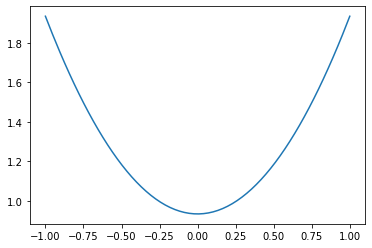

In [22]:
plt.plot(np.linspace(-1,1,128),Y)


Initial approximation:  [ 1.88202617  1.2000786   1.48936899  2.1204466   1.933779    0.51136106
  1.47504421  0.9243214   0.94839057  1.20529925  1.07202179  1.72713675
  1.38051886  1.06083751  1.22193162  1.16683716  1.74703954  0.89742087
  1.15653385  0.57295213 -0.27649491  1.3268093   1.4322181   0.62891749
  2.13487731  0.27281716  1.02287926  0.90640807  1.76638961  1.73467938
  1.07747371  1.18908126  0.55610713  0.00960177  0.82604393  1.07817448
  1.61514534  1.60118992  0.80633659  0.84884862  0.47572352  0.28999103
  0.1468649   1.9753877   0.74517391  0.78096285  0.37360232  1.38874518
  0.19305108  0.89362986  0.55226672  1.19345125  0.74459743  0.40968391
  0.98590889  1.21416594  1.03325861  1.15123595  0.68283895  0.81862942
  0.66376978  0.82022342  0.59342686  0.1368587   1.08871307  0.79910953
  0.18490083  1.23139113  0.54635082  1.0259727   1.36454528  1.06449146
  1.56970034  0.38258709  1.20117082  0.65759495  0.56460143  0.71057517
  0.84422373  1.02808267  0

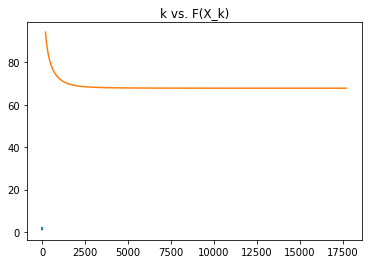

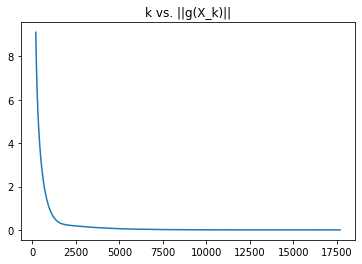

iterations:  17702
local minimum approximation:  [1.90840158 1.8914833  1.86719994 1.83986395 1.81142206 1.78275305
 1.7542536  1.7261028  1.69838148 1.67112614 1.64435324 1.61807022
 1.59228044 1.56698542 1.54218583 1.51788199 1.49407404 1.47076203
 1.44794601 1.42562597 1.40380193 1.38247389 1.36164185 1.34130581
 1.32146577 1.30212173 1.28327369 1.26492166 1.24706562 1.22970559
 1.21284155 1.19647352 1.18060149 1.16522546 1.15034543 1.1359614
 1.12207337 1.10868134 1.09578532 1.08338529 1.07148127 1.06007325
 1.04916123 1.03874521 1.02882519 1.01940117 1.01047315 1.00204113
 0.99410512 0.9866651  0.97972109 0.97327307 0.96732106 0.96186505
 0.95690504 0.95244103 0.94847302 0.94500102 0.94202501 0.93954501
 0.937561   0.936073   0.935081   0.934585   0.934585   0.935081
 0.936073   0.937561   0.93954501 0.94202501 0.94500102 0.94847302
 0.95244103 0.95690504 0.96186505 0.96732106 0.97327307 0.97972109
 0.9866651  0.99410512 1.00204113 1.01047315 1.01940117 1.02882519
 1.03874521 1.04

In [21]:
np.random.seed(0)
x_0=np.random.normal(1,0.5,size=128)
loc_min=Steepest_descent(alpha=0.001,x_0=x_0,f=f_normal,grad_f=f_normal_grad,pr='True')
print("local minimum approximation: ",loc_min)
print("f-Value: ",f_normal(loc_min))